##  The CHSH Game


_course: quantum cryptography for beginners
<br>last-update: 
<br>&emsp;10 october 2022
<br>&emsp;23 september 2024
<br>author: burton rosenberg_


The CHSH game has a strategy that uses an entangled pair of qubits to win a game of chance with great probability than can be achieved with any non-quantum strategy. The essence of the game is two plays flip coins and then post an outcome, we will call it red or green, that is scored according to the coin flips.

If the players could communicate after the coin flips, their winnings would be perfect. But they cannot. Neither knows the others coin flips, hence must play the odds as best as they can. Essentially the players must predict when the coin flips were heads-heads. They can only win at this game one out of four trials.

However, if each player has one qubit of an entangled pair of qubits, they can make a measurement on their quibit that depends on the coin flip. The entanglement will correlate the measures so that the players can signal when they have tossed a heads, allowing for a coordinated action in the case of heads-heads.

The experiment is named after John Clauser, Michael Horne, Abner Shimony, and Richard Holt, and was proposed in 1969. It was based on trying to prove Bell's Inequality, which gave a framework to test certain hidden-variable theories. 


### The game

Following the tradition in describing cryptographic protocols, our two players are Alice and Bob.

Alice and Bob each have a machine with a button that when pushed flips a fair coin. The box has two lights on top, one red and one green, the Alice and Bob will light to signal their decision based on the coin flip. They also half each one half of an EPR pair.

To assure Alice and Bob do not communicate after the coin flips, the Alice and Bob and their boxes will be placed light years apart, and their buttons will be pushed simultaneously by using a laser signal sent from a midpoint location between Alice and Bob. The light colors and a message about the coin flips will be sent back to the umpire at the source location of the laser, to determine if the game has been won or list.

<pre>

      (R)  (G)                       (R)  (G)
       |    |                         |    |
    +----------+                   +----------+
    |   [0/1]  ===|  &lt;-- * --&gt;  |===   [0/1]  |
    |          |                   |          |
    |   |&phi;&gt;    |                   |   |&phi;&gt;    |
    +----------+                   +----------+
       Alice                           Bob
</pre>

The umpire, on receiving from Alice and Bob their coin flips, and seeing the color of their lights, scores this way,

| Alice's coin | Bob's coin | Lights |
|:-:|:-:|:- |
| 0 | 0 | same color |
| 1 | 0 | same color |
| 0 | 1 | same color |
| 1 | 1 | different colors |

Hence Alice and Bob both have a strategies $\cal{A}(a,h), \cal{B}(b,h) \in\{\,\!\mbox{R, G}\}$
with $a,b\in_R \{\,0,1\,\}$, two unbaised independently drawn random variables, and $h$ some common strategy data.

### Classical computation


It was noted that classically, strategies exist to win 3/4 of the time. 


#### Null strategy

One strategy is for Alice and Bob to always play green. This makes they always correct in all cases except heads-heads, and in that case they are always wrong. Hence the probabilty of winning is the probabily of avoiding the case heads-heads, or 3/4.

#### Mixed Randomized and Null

Alice and Bob can trade-off certainty in all cases for some winning in all cases by having Alice always play green and Bob play green on tails, but on heads play green with probability $p$ and red with probability $1-p$. Working through the math, this still gives 3/4 for all $p$. With $p=0$ we have the null strategy, and with $p=1$ we have another deterministic strategy, this one with tails-heads always losing and the other three cases always winning.


#### Optimal strategy

An argument that 3/4 is the optimal win amount can be based on a reduction argument, in which:

- From a strategy to win with greater than 3/4 can be create a algorithm to predict a fair coin with success greater than 1/2.

It seems a valid axiom that we cannot do such a prediction, and therefore we cannot have strategy with a win greater than 3/4.

#### Quantum

However, if Alice and Bob can communicate, they can simply reveal their coins and will all the time. The CHSH game is constructed to make classical communication between Alice and Bob impossible, but uses an entangled qubit pair to create a channel of correlation between Alice and Bob. 


### Quantum computation with entanglement.

Alice and Bob share a Bell state, $|00\rangle+|11\rangle$. Alice will measure one of the qubits in a basis depending on her coin flip, and Bob will do so on the other qubit. The measurement basis will be described by $|\phi\rangle$ described by the Bloch angle $\theta$ (the measurements will be in the $x$-$z$ plane). 

| Alice's coin | Alice's $\theta$ | Bob's coin | Bob's $\theta$  |
|:-:|:-:|:-:|:-:|
| 0 | 0 | 0 | $\pi/4$ |
| 1 | $\pi/2$ | 1 | $-\pi/4$ |

That is, Alice will measure on the Z basis for tails and the X basis for heads. Bob's measurements do not have standard terminolgy, but all these measurements are,

$$
M_\theta = \pmatrix{\cos \theta/2 & \sin \theta/2 \\ \sin \theta/2 &  -\cos \theta/2 \\ }
$$

We run the experiments. Looking at the historgram of results, we see that for 3 of the 4 coin flips, we decidedly have a positive correlation between the Alice and Bob's measurements; for the fourth coin flip result, we decidely have a negative correlation. This is all we need to the fashion out the narrative of red or green lights.

See [this diagram](https://github.com/csc-courses/csc685/blob/master/edition-231/chsh-game.pdf). 

The arrows are the directions of measurement for Alice and Bob. It does not matter who measures first, even the notation of simultaneity is a bit suspect, but lets guess that Alice measured first.

If Alice's coin is 0 she measures along A0g and more than likely sets the state vector in that direction. Whatever Bob's coin, he measures in mostly the same direction so both Alice and Bob decide green. More likely than not to be correct. 

If Alice's coin is 1 she measures along A1r and if the state vector ends up in that direction, she decides red. In this case Bob's coin makes a difference: if it is 0 it is likely to measure green for a correct decision; if it is is 1 it is likely to measure red (its red direction is aligned closer to A1r) also for a correct decision. 

### Measuring at &pi;/8

In all of the cases favorable to a win, the two measurements are being made at $\pi/8$ from each other. Hence the advantage over all will be,

$$
\cos^2 \pi/8 = \left({{1}\over{2}}\,\sqrt{2+\sqrt{2}}\right)^2 = 0.8536
$$

__N.B.:__ This uses the half-angle formula,
$$
2 \cos (\theta/2) = \sqrt{ 2 + 2 \cos \theta }
$$
so,
$$
2 \cos \pi/8 = \sqrt{2+2\cos\pi/4} = \sqrt{2+\sqrt{2+2\cos\pi/2}}= \sqrt{2+\sqrt{2}}
$$ 

In [3]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, Pauli 
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from IPython.display import display, Math, HTML
import time, math
import numpy as np

print(f'\nqiskit version: {qiskit.version.get_version_info()}\n')

from qiskit.circuit import Parameter
from qiskit.primitives import StatevectorSampler, StatevectorEstimator
from qiskit.providers.basic_provider import BasicSimulator



qiskit version: 1.1.2



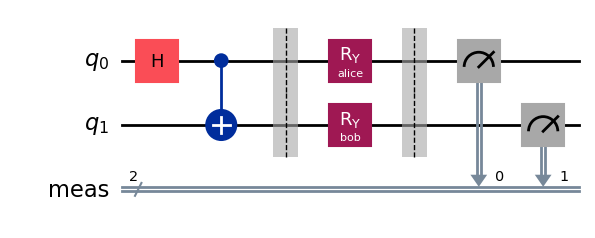

TT {'11': 444, '00': 436, '01': 67, '10': 77} 0.859375
TH {'00': 428, '11': 442, '10': 83, '01': 71} 0.849609
HT {'11': 445, '01': 82, '00': 427, '10': 70} 0.851562
HH {'01': 432, '00': 80, '10': 426, '11': 86} 0.162109


In [4]:
alice = Parameter('alice')
bob = Parameter('bob')
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.barrier()
qc.ry(alice, 0)
qc.ry(bob, 1)
qc.measure_all()
display(qc.draw('mpl'))

games = [
    ('TT',{alice:0, bob:np.pi/4}),
    ('TH',{alice:0, bob:-np.pi/4}),
    ('HT',{alice:np.pi/2, bob:np.pi/4}),
    ('HH',{alice:np.pi/2, bob:-np.pi/4})]

basic_sim = BasicSimulator()

for game in games:
    bc = qc.assign_parameters(game[1])    
    job = basic_sim.run(bc,shots=1024)
    result = job.result()
    same = result.get_counts()['11']+result.get_counts()['00']
    diff = result.get_counts()['01']+result.get_counts()['10']
    print(game[0],result.get_counts(), '{:4f}'.format(same/(same+diff)))

### Exercise A

The Bell pair might seem to only allow for final states $|00\rangle$ or $|11\rangle$, as suggested by how it is written. However, whatever the measurement is made on one qubit, the other qubit will assume that state.

Devise an experiement to demonstrate this.



In [4]:
# your answer here


    

### Exercise B

The Bell pair must be kept entangled else the game will not work completely. Devise an experiment to learn how disurbing the entanglement will affect the game.

_Hint:_ Insert a measurement on one of the qubits before the measurement and see how that changes the advantage of the game.


In [5]:
# your experiement here



### Exercise C

Explore the choice of Bob's measurement. Change Bob's measurement from $\pi/8$ to values closer to 0 and see how that effects the advantage of the game.

_Hint:_ Redfine alice_bob_circuit() then use all the other code.

In [6]:

# your code here



### Exercise D

Show that Alice is measuring either on the Z basis or the X basis and Bob on the axis that is fixed by the H gate.

#### END